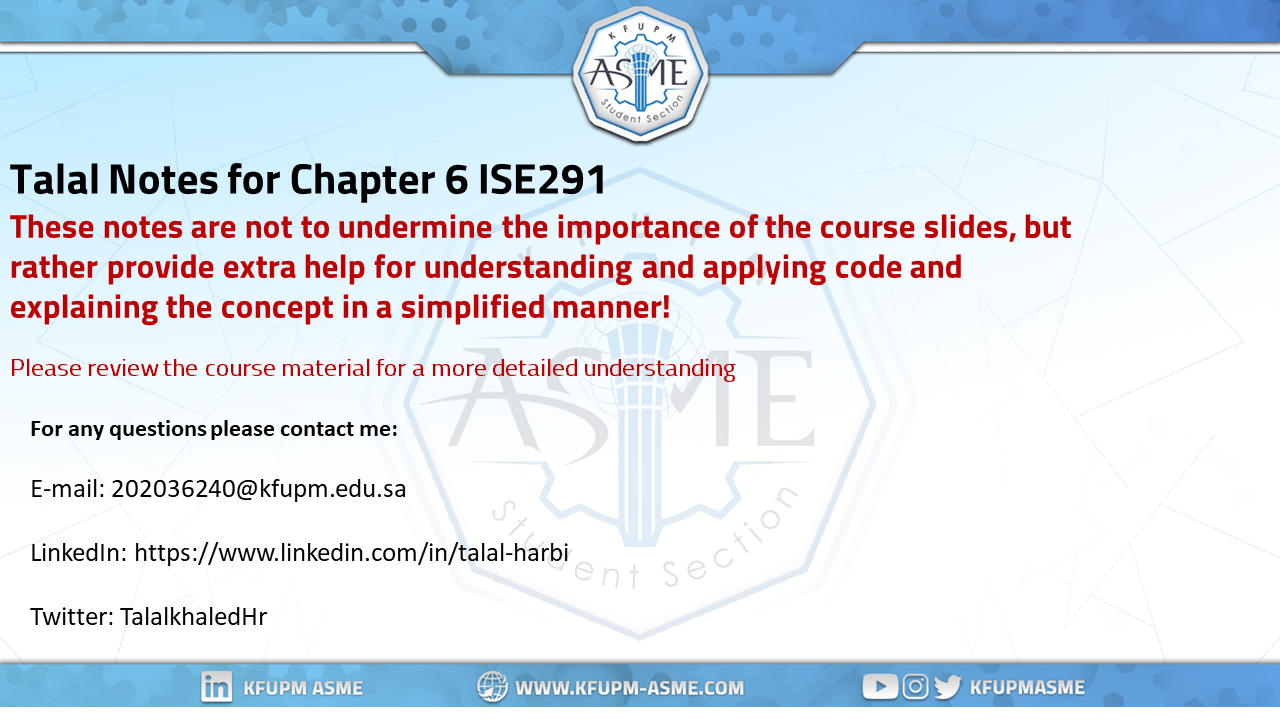

# Correlation Analysis

Correlation Analysis is a way to see how variables/columns are correlated (not related, but correlated to be specific)

- Correlation value have a strength (magnitude) and a direction
    - 1 equals -1 in strength, but opposite in direction $$
r = \frac{N \sum xy-\sum x \sum y}{\sqrt{\left[N\sum x^2-\left(\sum x\right)^2\right]\left[N\sum y^2-\left(\sum y\right)^2\right]}}
$$
    - However you are allowed to bring a calculator. From this video @ [2:21], **r** is correlation coefficient https://www.youtube.com/watch?v=ttTO7CetjVk (😀ادعوا لي)

In [2]:
## It even easier to get using python code!

import pandas as pd
df = pd.read_csv('data/EDA-1.csv', delimiter =',')
display(df)

Weight  Height
0    64.5     118
1    73.3     143
2    68.8     172
3    65.0     147
4    69.0     146
5    64.5     138
6    66.0     175
7    66.3     134
8    68.8     172
9    64.5     118

In [3]:
corr = df.corr(method = 'pearson')
display(corr)

Weight    Height
Weight  1.000000  0.389583
Height  0.389583  1.000000

### The reason corr is presented as a matrix is that we might have more than one variable. Therefore, a matrix would show the correlation coefficient between each value.

- Here we can see that r = 0.389583
- r = 1 means the correlation is with the variable itself

# Principal Component Analysis (PCA)
### <span style = 'color:#ec042d'> **These points are crucial, please read them thoroughly** </span>

- The idea is to find directions that capture **maximum variations.**
- The **FIRST principal component**, gives us the **maximum variation on the principal direction** (which is linear combination of original the columns).
- The **second principal component**, gives us the **next maximum variation** on another direction (which is **perpendicular to the first principal direction**). This direction is also a linear combination of original the columns.
- The third principal component, gives us the next maximum variation on another direction (which is perpendicular to the first and second principal direction). This direction is also a linear combination of original the columns.
- Similarly, all the **principal components are ranked, based on how much variation they can capture**.
- The **number of principal component is equal to number of samples (or records) or number of dimensions (or columns) (whichever is smaller)**

#### <mark> We will use sklearn.decomposition library to obtain PCs, no prior knowledge of linear algebra is required to obtain PCs.</mark>

In [23]:
import numpy as np
import pandas as pd
df = pd.read_csv('data/EDA-2.csv', delimiter = ',')
display(df.head(5))
display(df.info())

origin   car_name  model_year  cylinders  displacement  horsepower  \
0  american  chevrolet          70          8         307.0         130   
1  american      buick          70          8         350.0         165   
2  american   plymouth          70          8         318.0         150   
3  american        amc          70          8         304.0         150   
4  american       ford          70          8         302.0         140   

   weight  acceleration   mpg  economy  
0    3504          12.0  18.0        1  
1    3693          11.5  15.0        0  
2    3436          11.0  18.0        1  
3    3433          12.0  16.0        1  
4    3449          10.5  17.0        1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   origin        392 non-null    object 
 1   car_name      392 non-null    object 
 2   model_year    392 non-null    int64  
 3   cylinders     392 non-null    int64  
 4   displacement  392 non-null    float64
 5   horsepower    392 non-null    int64  
 6   weight        392 non-null    int64  
 7   acceleration  392 non-null    float64
 8   mpg           392 non-null    float64
 9   economy       392 non-null    int64  
dtypes: float64(3), int64(5), object(2)
memory usage: 30.8+ KB


None

### We see from df.info() that all our records do not contain null objects ( we do not have any missing data)

## Rules about PCA analysis

- Only numerical columns can be used to get principal components.
- You can ENCODE all the non-numerical columns to numerical, if needed.
- Here we use the existing numerical columns as **INPUT** columns for obtaining principal components.
- If you have an **OUTPUT** columns, drop them

In [24]:
num_columns = df.select_dtypes(exclude='object').columns
pca_input_columns=num_columns.drop(['economy'])

from sklearn.decomposition import PCA

pca = PCA(n_components=2) ## Define a pca object
principalComponents = pca.fit_transform(df[pca_input_columns]) ## fit our data to our pca object

## Here we used fit_transform rather than fitting first and transforming second ##
# pca.fit(df[pca_input_columns])
# principalComponents = pca.transform(df[pca_input_columns])


print('Our PCA values',principalComponents[0:4,0],'\n\n\t\t',principalComponents[0:4,1])
## To see what we are actually working with, notice the first four records in both pca1 & pca2 columns


df['pca1'] = principalComponents[:,0] ## We add those data to the dataframe
df['pca2'] = principalComponents[:,1]

display(df)

Our PCA values [536.47059639 730.38430228 471.00913864 466.44430795] 

		 [50.84739287 79.17544183 75.4692007  62.59407035]


origin    car_name  model_year  cylinders  displacement  horsepower  \
0    american   chevrolet          70          8         307.0         130   
1    american       buick          70          8         350.0         165   
2    american    plymouth          70          8         318.0         150   
3    american         amc          70          8         304.0         150   
4    american        ford          70          8         302.0         140   
..        ...         ...         ...        ...           ...         ...   
387  american        ford          82          4         140.0          86   
388  european  volkswagen          82          4          97.0          52   
389  american       dodge          82          4         135.0          84   
390  american        ford          82          4         120.0          79   
391  american       chevy          82          4         119.0          82   

     weight  acceleration   mpg  economy        pca1       pca2  
0      3504          12.0  18.0        1  536.470596  50.847393  
1      3693          11.5  15.0        0  730.384302  79.175442  
2      3436          11.0  18.0        1  471.009139  75.469201  
3      3433          12.0  16.0        1  466.444308  62.594070  
4      3449          10.5  17.0        1  481.702722  55.820351  
..      ...           ...   ...      ...         ...        ...  
387    2790          15.6  27.0        1 -193.183295 -34.516523  
388    2130          24.6  44.0        2 -854.711622  -6.160509  
389    2295          11.6  32.0        2 -685.224710  20.039018  
390    2625          18.6  28.0        1 -359.540884 -35.695578  
391    2720          19.4  31.0        2 -265.260929 -47.309005  

[392 rows x 12 columns]

### <mark> Notice that we dropped economy from our num_columns, not our data frame.</mark>

### The next question we ask ourselves is how much variation is captured by each of the principal components.

- We already know that pca1 should capture the maximum variation

In [38]:
## To see how much variation is captured by our PCAs after fitting our data, use the following variable
listVariance = pca.explained_variance_ratio_*100

print(f"""The variance captured by pca 1 is: {listVariance[0]: 0.2f}%
The variance captured by pca 2 is: {listVariance[1]: 0.2f}%""")

The variance captured by pca 1 is:  99.75%
The variance captured by pca 2 is:  0.21%


### <mark> Please refer to "Figures" folder for explanation of graphical comprehension of PCA analysis and more.</mark>

### “Strive not to be a success, but rather to be of value.” ― Albert Einstein.

### For any questions please contact me:

E-mail: 202036240@kfupm.edu.sa

LinkedIn: https://www.linkedin.com/in/talal-harbi

Twitter: TalalkhaledHr